In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import fashion_mnist

fmnist = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(X_train, y_train), (X_test, y_test) = fmnist

In [10]:
X_train.shape

(60000, 28, 28)

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

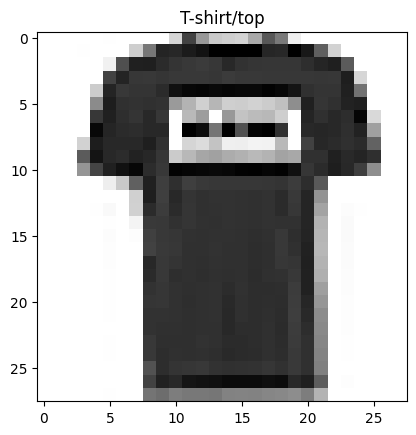

In [16]:
i = 1
plt.imshow(X_train[i], cmap='binary')
plt.title(class_names[y_train[i]])
plt.show()

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
# First method: Sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer

1. Regression output faqat 1 ta neurondan iborat bo'ladi va hech qanday activation function ishlatilmaydi.
2. Classification, agar binary classification bo'lsa 1 ta neuron bo'ladi va sigmoid activation function ishlatiladi.
3. Classification, agar multiclass classification bo'lsa n ta neuron bo'ladi va softmax activation function ishlatiladi.

In [62]:
tf.random.set_seed(42)
model = Sequential([
    InputLayer(shape=[28, 28]),
    Flatten(name='flatten_layer'),
    Dense(300, activation='relu', name='hidden1'),
    Dense(100, activation='relu', name='hidden2'),
    Dense(10, activation='softmax', name='output')
])

# (N,784) -> (N, 300) -> (N, 100) -> (N, 10)

In [63]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_layer (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.layers[1]

<Dense name=hidden1, built=True>

In [65]:
weights, biases = model.get_layer('hidden1').get_weights()

In [67]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7851 - loss: 0.6098 - val_accuracy: 0.8555 - val_loss: 0.3958
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8637 - loss: 0.3714 - val_accuracy: 0.8583 - val_loss: 0.3800
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8768 - loss: 0.3310 - val_accuracy: 0.8610 - val_loss: 0.3763
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8859 - loss: 0.3055 - val_accuracy: 0.8649 - val_loss: 0.3685
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8921 - loss: 0.2855 - val_accuracy: 0.8711 - val_loss: 0.3531
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8973 - loss: 0.2694 - val_accuracy: 0.8689 - val_loss: 0.3559
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9029 - loss: 0.2547 - val_accuracy: 0.8749 - val_loss: 0.3535
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9070 - loss: 0

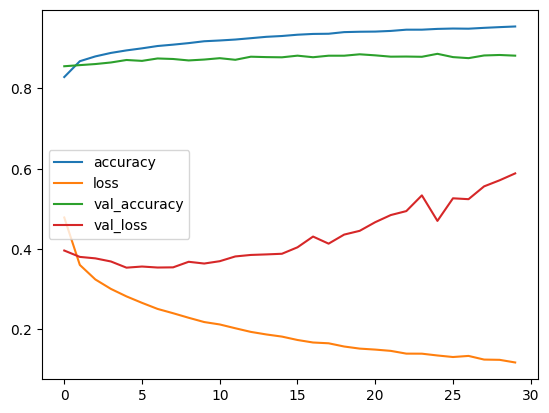

In [69]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.show()

In [70]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8803 - loss: 0.6172


[0.5882384777069092, 0.8819000124931335]

In [71]:
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [73]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

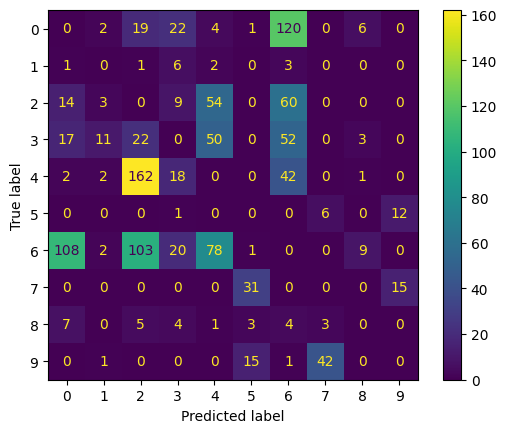

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, sample_weight= y_pred != y_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [75]:
y_pred == 6

array([9, 2, 1, ..., 8, 1, 5])

In [76]:
y_test == 0

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [78]:
X_wrong = X_test[(y_pred == 6) * (y_test == 0)]

Predicted: Shirt
Actual: T-shirt/top


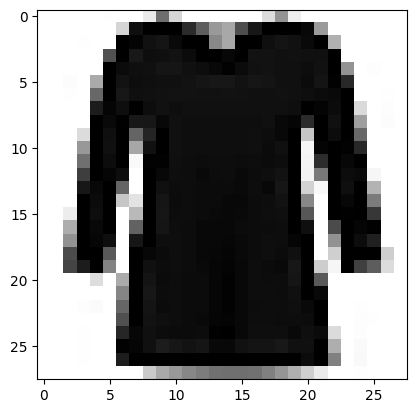

In [83]:
print("Predicted:", class_names[6])
print("Actual:", class_names[0])
plt.imshow(X_wrong[1], cmap='binary')
plt.show()